# Table of Contents
 <p><div class="lev1 toc-item"><a href="#PH150-Week-5" data-toc-modified-id="PH150-Week-5-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PH150 Week 5</a></div><div class="lev1 toc-item"><a href="#Another-look-at-the-Math" data-toc-modified-id="Another-look-at-the-Math-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Another look at the Math</a></div><div class="lev1 toc-item"><a href="#Algorithm-for-projectile-motion-with-non-constant-acceleration," data-toc-modified-id="Algorithm-for-projectile-motion-with-non-constant-acceleration,-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Algorithm for projectile motion with non-constant acceleration,</a></div><div class="lev2 toc-item"><a href="#Your-Assignment:" data-toc-modified-id="Your-Assignment:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><b><span style="color: red">Your Assignment:</span></b></a></div><div class="lev1 toc-item"><a href="#Projectile-motion-function" data-toc-modified-id="Projectile-motion-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Projectile motion function</a></div><div class="lev2 toc-item"><a href="#Your-Assignment:" data-toc-modified-id="Your-Assignment:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><b><span style="color: red">Your Assignment:</span></b></a></div><div class="lev1 toc-item"><a href="#Drag" data-toc-modified-id="Drag-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Drag</a></div><div class="lev2 toc-item"><a href="#Your-Assignment:" data-toc-modified-id="Your-Assignment:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><b><span style="color: red">Your Assignment:</span></b></a></div>

# PH150 Week 5
Last week we looked at the definition of acceleration and showed how you use this to develop an algorithm to find velocities at any given time.  We also saw the same process for position.  This week we'll develop a projectile motion function that can give position and velocity at any time for a non-constant acceleration. We'll then look at a specific non-constant acceleration, drag.

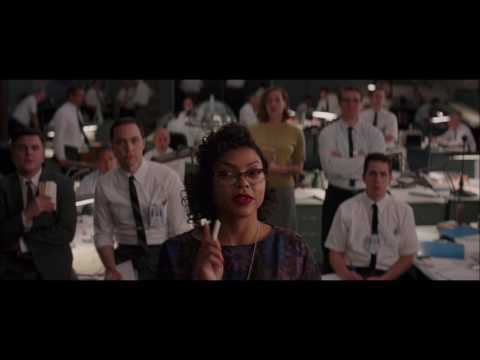

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('v-pbGAts_Fg')

# Another look at the Math
If the acceleration is constant we can take the definitions of acceleration and velocity 

$$a=\frac{dv}{dt}  ~~~\mbox{and}~~~ v=\frac{dx}{dt}$$

and by using integration derive the kinematic equations.
\begin{equation} a=constant~~~\rightarrow~~~v=v_0+at~~~\mbox{,}~~~x=x_0+v_0t+\frac{1}{2}at^2 \end{equation}

If the acceleration is not constant it is not always possible to derive nice mathematical equations for position and velocity.  But we can still make a numerical approximation to find the position and velocity.  To do this we first make an approximation for the derivatives by replacing the infinitely small $d$ with a very small $\Delta$:
$$a=\frac{\Delta v}{\Delta t}  ~~~\mbox{and}~~~ v=\frac{\Delta x}{\Delta t}$$
We then replace $\Delta v$ and $\Delta x$ with their defintions and solve for their new values:
$$\Delta v = v_{new}-v_{old}~~~\mbox{and}~~~\Delta x = x_{new}-x_{old}$$
Then solve for the new values.
\begin{equation} v_{new}= v_{old}+a (\Delta t) ~~~\mbox{and}~~~ x_{new}= x_{old}+v (\Delta t) \end{equation}

Think of these equations as a update to the old values.  Also, please note these(2) are not the kinematic equations(1).  They are significantly different in a number of ways.
1. They don't require a constant acceleration
2. The $\Delta t$ must be small for them to work well
3. They only make small changes at a time, updating the old values to the new by only a small step

These differences can be a problem because they can't tell us posistion and velocity any any given time; only at the next little bit of time. But they also free us from only looking at systems with constant acceleration.  We over come their problem by simply using these same equations over and over again.


# Algorithm for projectile motion with non-constant acceleration, 

- first find the value of the acceleration, velocity and position at the start
$$a_0= f(v_0,x_0,t_0)~~~\mbox{and}~~~v_0~~~\mbox{and}~~~x_0$$

- also choose a value for $\Delta t$, make sure it is small.

- then use the update equation to find the next value's for $v$ and $x$

$$v_1= v_0+a_0 (\Delta t) ~~~\mbox{and}~~~ x_1= x_0+v_0 (\Delta t)~~~\mbox{and}~~~ t_1=t_0+\Delta t$$

- use these new values to find the acceleration again at this next step

$$a_1= f(v_1,x_1,t_1)$$

- use them again to step forward just a bit and find the next values

$$v_2= v_1+a_1 (\Delta t) ~~~\mbox{and}~~~ x_2= x_1+v_1 (\Delta t)~~~\mbox{and}~~~ t_2=t_1+\Delta t$$

- then do it again and again until you've got to the step you care about.

## <b><span style="color:red;">Your Assignment:</span></b>
- pull out a real piece of paper and write an algorithm for a projectile motion function. An algorithm is a description of the process that describes in words what the computer code will do. 
- Be sure that it includes a loop. Loops can be shown in an algorithm in a number of different ways. An arrow going from the end of the process back to the beginning of the loops is one. Choose a way that works best for you.
- This piece of paper, with your algorithm on it, is your ticket to class. You will not be admitted to class without it!

# Projectile motion function
To create a function that models the trajectory of a rocket we need to recall a few things. We may want to plot the position vs time or the velocity vs time or even the acceleration vs time.  Because we want to make these plots we'll need each of these values to be arrays, not just single valued variables.  We'll also want to add values to the end of the array as we update.

In [12]:
import numpy as np
x=np.array([])
x=np.append(x,[1])
print(x)
x=np.append(x,[2])
print(x)
x=np.append(x,[3])
print(x)

[ 1.]
[ 1.  2.]
[ 1.  2.  3.]


A while loop will be used to keep updating the acceleration, velocity, position and time.  You can stop the loop based off of any number of conditions, but the position is a common thing to check.

In [13]:
i=0
while (x[i]>0):
    # do stuff that changes the array x and the array v
    x=np.append(x,0)
    # also change i
    i=i+1

## <b><span style="color:red;">Your Assignment:</span></b>
- implement your algorithm by making a function that models a simple projectile
- start by assume the acceleration is a constant -g
- make a plot of the position vs time for a projectile started at 1m high and with a positive velocity of 3m/s
- change the acceleration so that it is not constant. You could make it depend on time, velocity or position. Just make it change in some way and make a plot. Check to see if the plot make sense given the way you made the acceleration change. 

# Drag
Air drag changes the acceleration of a object in air.  The drag force is
$$F_D=-\frac{1}{2} C \rho A v^2 $$
The total force on an object falling in air then is
$$\sum F=F_g +F_D=ma$$
so the total acceleration is
$$a=-g-\frac{1}{m}\frac{1}{2} C \rho A v^2 \hat{v}$$
Notice the $\hat{v}$ at the end. This is a symbol used to denote the direction of $v$, the velocity. It indicates that the direction of the drag is always opposite the direction of the velocity. Think about how to include this in your code.

## <b><span style="color:red;">Your Assignment:</span></b>
- Change your projectile function to include drag, a non-constant acceleration
- Use your function to model the falling of a crumpled up piece of paper
- Compare the time it takes a crumpled up piece of paper with your numerical model's time for falling, i.e. do the experiment.